In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
from mpl_toolkits.mplot3d import *
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
df = pd.read_csv('/Users/albert/Documents/GitHub/housing_analysis/house-data/train.csv')

In [4]:
df = df[ df.select_dtypes(include=np.number).columns.tolist()]

In [5]:
df.dropna(inplace=True)

In [6]:
#GrLivArea: Above grade (ground) living area square feet

In [81]:
def f(x, data_reg):
    P = [i for i in range(len(data_reg))]
    P.reverse()
    predicted = sum( [a*(x**p) for a, p in zip(data_reg, P) ] )
    return predicted

In [167]:
deg = 2
data_reg = np.polyfit(df["GrLivArea"], df["SalePrice"], deg)

Y = df["SalePrice"].tolist()
X = df["GrLivArea"].tolist()
M = df["SalePrice"].mean()

SSres = sum( [(y-f(x, data_reg))**2 for y, x in zip(Y,X)] )
SStot = sum( [(y-M)**2 for y in Y ] )

R2 = 1-(SSres/SStot)

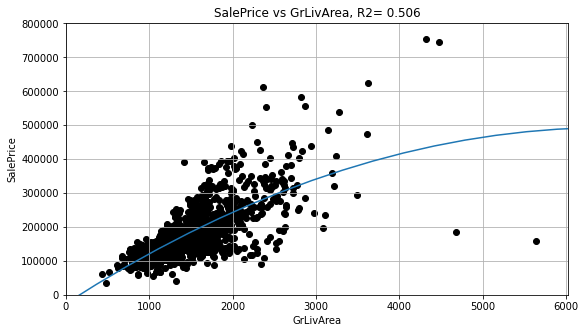

In [170]:
xp = np.linspace(1, 7*(10**3), 20)
yp = np.polyval(data_reg, xp)
fig = plt.figure(figsize=(9,5))
#ax = fig.add_subplot()
ax = plt.axes()
plt.scatter(df["GrLivArea"], df["SalePrice"], label = "SalePrice vs GrLivArea", color="black")
ax.plot(xp, yp)#, label="Pol. Reg.")
ax.set_ylim(bottom=0, top = df["SalePrice"].max()+df["SalePrice"].mean()/4)
ax.set_xlim(0, df["GrLivArea"].max()+df["GrLivArea"].mean()/4)
ax.set_title(f"SalePrice vs GrLivArea, R2= {round(R2, 3)}")
ax.set_xlabel("GrLivArea")
ax.set_ylabel("SalePrice")
ax.grid()